In [3]:
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.utils.data
from torch import nn
from torch.nn import functional as F

import seaborn as sns

from model import end2end_kernel
from model import end2end_crps
from model import deep_ensemble
from model import concrete_dropout
from model import subnetwork

import tqdm

import os

torch.manual_seed(1)
np.random.seed(1)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
def featurize(x):
    return torch.cat([x[:, None], x[:, None]**2], dim=1)

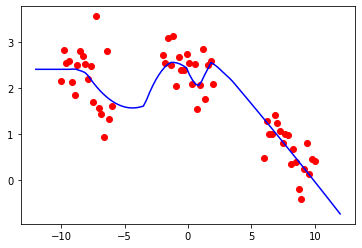

In [5]:
arr = np.load("data.npz") 
x = torch.from_numpy(arr['x'])
f = featurize(x)
y = torch.from_numpy(arr['y']) * 10

x_ = torch.from_numpy(arr['x_'])
f_ = featurize(x_)
y_ = torch.from_numpy(arr['y_']) * 10

plt.plot(x.data.numpy(), y.data.numpy(), "ro")
plt.plot(x_.data.numpy(), y_.data.numpy(), "-b")

In [19]:
end2end_model = end2end_kernel.train_model_kernel(x.reshape(-1, 1), y, n_epoch = 1000, hidden_layers = [10, 10, 10], learning_rate = 0.004, exp_decay = .999)

initial loss:  8.061206817626953
nllk loss:  tensor(4.6576, grad_fn=<MeanBackward0>) kernel loss: tensor(1.1345, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.0992, grad_fn=<MeanBackward0>) kernel loss: tensor(2.6415, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.8704, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0548, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.5197, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0861, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.1981, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1826, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.1141, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0159, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8229, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3335, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9093, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(2.7670, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1957, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.4919, grad_fn=

nllk loss:  tensor(0.1970, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(0.1884, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(0.1799, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1153, grad_fn=<AddBackward0>)
nllk loss:  tensor(0.1704, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0777, grad_fn=<AddBackward0>)
nllk loss:  tensor(0.1663, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(0.1579, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(0.1496, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(0.1414, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0400, grad_fn=<AddBackward0>)
nllk loss:  tensor(0.1334, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0189, grad_fn=<AddBackward0>)
nllk loss:  tensor(0.1249, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2210, grad

nllk loss:  tensor(-0.5388, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1181, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.4971, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1137, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.5275, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0473, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.5856, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0422, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.5819, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.6038, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.6197, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0273, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.6276, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0155, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.6453, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0511, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.6318, grad_fn=<MeanBackward0>) kernel los

nllk loss:  tensor(-0.7117, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.7373, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0291, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.6786, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.7073, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0143, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.6981, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0883, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.7358, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.7414, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.7437, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0662, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.7174, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.7289, grad_fn=<MeanBackward0>) kernel loss: tensor(0.

nllk loss:  tensor(-0.7727, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.7805, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.7829, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.7843, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.7850, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.7861, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0147, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.7812, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.7845, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0107, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.7620, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.7750, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0033, gr

nllk loss:  tensor(-0.8029, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.8143, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0363, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.7964, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.8149, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.8191, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0040, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.8123, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0095, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.7943, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.8120, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0327, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.6847, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.7875, grad_fn=<MeanBackward0>) kernel loss: tensor(0.

nllk loss:  tensor(-0.7749, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.8297, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0018, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.8378, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0818, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.8380, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.8403, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.8427, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.8409, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0132, grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.8009, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.8314, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.8357, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1298

nllk loss:  tensor(-0.8668, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.8655, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.8675, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.8663, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.8681, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.8669, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.8687, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.8676, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.8693, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-0.8682, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBa

(-1.0, 4.0)

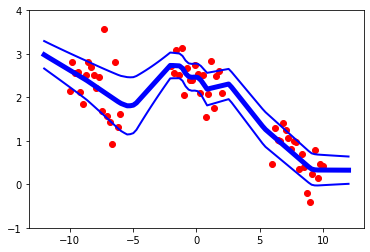

In [20]:
pred_mean, pred_var, _ = end2end_model(x_.reshape(-1, 1))
pred_std = torch.sqrt(pred_var)
pred_upper = pred_mean + pred_std
pred_lower = pred_mean - pred_std

plt.plot(x.data.numpy(), y.data.numpy(), "ro")
# plt.plot(x_.data.numpy(), y_.data.numpy(), "--k")
plt.plot(x_.data.numpy(), pred_mean.detach().numpy(), "-b", lw=5)
plt.plot(x_.data.numpy(), pred_lower.detach().numpy(), "-b", lw=2)
plt.plot(x_.data.numpy(), pred_upper.detach().numpy(), "-b", lw=2)
plt.ylim(-1, 4)

In [6]:
end2end_model = end2end_crps.train_model_nllk(x.reshape(-1, 1), y, n_epoch = 1000, hidden_layers = [10, 10, 10], learning_rate = 0.004, exp_decay = 1)

initial loss:  13.876880645751953
final loss:  -0.8707781434059143


(-1.0, 4.0)

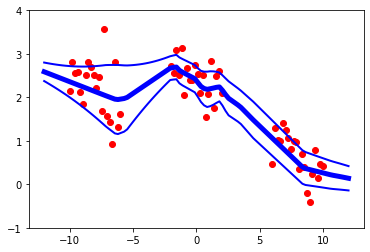

In [7]:
pred_mean, pred_var = end2end_model(x_.reshape(-1, 1))
pred_std = torch.sqrt(pred_var)
pred_upper = pred_mean + pred_std
pred_lower = pred_mean - pred_std

plt.plot(x.data.numpy(), y.data.numpy(), "ro")
# plt.plot(x_.data.numpy(), y_.data.numpy(), "--k")
plt.plot(x_.data.numpy(), pred_mean.detach().numpy(), "-b", lw=5)
plt.plot(x_.data.numpy(), pred_lower.detach().numpy(), "-b", lw=2)
plt.plot(x_.data.numpy(), pred_upper.detach().numpy(), "-b", lw=2)
plt.ylim(-1, 4)

In [4]:
ensemble_model = deep_ensemble.train_model(x.reshape(-1, 1), y, n_epoch = 1000, hidden_layers = [10, 10, 10], learning_rate = 0.004, exp_decay = 1)

initial loss:  4.622530937194824
final loss:  -0.9343482851982117
initial loss:  13.876880645751953
final loss:  -0.8707781434059143
initial loss:  7.230439186096191
final loss:  -0.8795917630195618
initial loss:  13.98351764678955
final loss:  -0.8920456767082214
initial loss:  5.744476795196533
final loss:  -0.8684943914413452


(-1.0, 4.0)

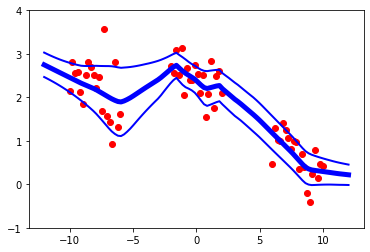

In [21]:
pred_mean, pred_var = ensemble_model(x_.reshape(-1, 1))
pred_std = torch.sqrt(pred_var)
pred_upper = pred_mean + pred_std
pred_lower = pred_mean - pred_std

plt.plot(x.data.numpy(), y.data.numpy(), "ro")
# plt.plot(x_.data.numpy(), y_.data.numpy(), "--k")
plt.plot(x_.data.numpy(), pred_mean.detach().numpy(), "-b", lw=5)
plt.plot(x_.data.numpy(), pred_lower.detach().numpy(), "-b", lw=2)
plt.plot(x_.data.numpy(), pred_upper.detach().numpy(), "-b", lw=2)
plt.ylim(-1, 4)

In [144]:
dropout_model = concrete_dropout.train_model(x.reshape(-1, 1), y, n_epoch = 300, learning_rate = 0.02, n_features = 10)

final loss:  -1.374746322631836


(-1.0, 4.0)

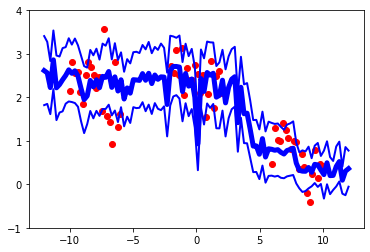

In [145]:
pred_mean, log_var_pred, _ = dropout_model(x_.reshape(-1, 1))
pred_std = torch.sqrt(torch.exp(log_var_pred))
pred_upper = pred_mean + pred_std
pred_lower = pred_mean - pred_std

plt.plot(x.data.numpy(), y.data.numpy(), "ro")
# plt.plot(x_.data.numpy(), y_.data.numpy(), "--k")
plt.plot(x_.data.numpy(), pred_mean.detach().numpy(), "-b", lw=5)
plt.plot(x_.data.numpy(), pred_lower.detach().numpy(), "-b", lw=2)
plt.plot(x_.data.numpy(), pred_upper.detach().numpy(), "-b", lw=2)
plt.ylim(-1, 4)

In [60]:
subnetwork_model = subnetwork.train_model(x.reshape(-1, 1), y, n_epoch = 1000, hidden_layers = [10, 10, 10], learning_rate = 0.004, exp_decay = 1)

initial loss:  6.4856038093566895
final loss:  -0.428193062543869


(-1.0, 4.0)

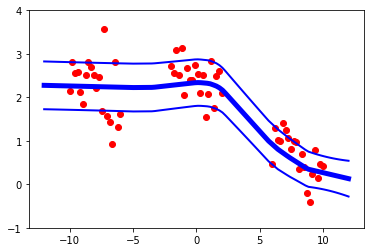

In [61]:
pred_mean, pred_var = subnetwork.test_model(subnetwork_model, x_.reshape(-1, 1))
pred_std = torch.sqrt(pred_var)
pred_upper = pred_mean + pred_std
pred_lower = pred_mean - pred_std

plt.plot(x.data.numpy(), y.data.numpy(), "ro")
# plt.plot(x_.data.numpy(), y_.data.numpy(), "--k")
plt.plot(x_.data.numpy(), pred_mean.detach().numpy(), "-b", lw=5)
plt.plot(x_.data.numpy(), pred_lower.detach().numpy(), "-b", lw=2)
plt.plot(x_.data.numpy(), pred_upper.detach().numpy(), "-b", lw=2)
plt.ylim(-1, 4)